## Packages

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

## Parameters & Main Functions

In [7]:
b0 = 0
c12 = .005

N1 = 5000
N = 10000
g = .1
chat1 = .02
a = 1
a21 = 20
a22 = 40

chat2 = .01
N2 = 5000

a1=  (a21*b0)/(2*a)

a2= (a22*b0)/(2*a)

In [8]:
#equation1
def equation1(i,j):
    return ((a1*b0)/N)*(i*i*i) + ((a1*b0)*(j/N) - b0*chat1 - a1*b0*(N1/N))*(i*i) + (b0*chat1*N1 - b0*a1*j*(N1/N) - b0*c12*j + 1 - g)*i + (b0 * c12*j*N1)

In [9]:
#equation2
def equation2(i,j):
    return ((a2*b0)/N)*(j*j*j) + ((a2*b0)*(i/N) - b0*chat2 - a2*b0*(N2/N))*(j*j) + (b0*chat2*N2 - b0*a2*i*(N2/N) - b0*c12*i + 1 - g)*j + (b0 * c12*i*N2)

In [10]:
def workablePairs(string):
    workable_pairs = []
    all_pairs = []
    for pair in string.split("{"):
        pairsmall = pair.split("->")
        if len(pairsmall) > 2:
            i = float(pairsmall[1].split(",")[0])
            j = float(pairsmall[2].split("}")[0])

            if i <= 5000 and i > 0 and j <=5000 and j > 0:
                workable_pairs.append(i)
                workable_pairs.append(j)
            all_pairs.append(i)
            all_pairs.append(j)
    return workable_pairs,all_pairs

In [11]:
def runSolve(string, b0_given, c12_given = c12):
    changeVar(b0_given,c12_given)
    
    return workablePairs(string)
   
    

In [12]:
def changeVar(b0_given, c12_given = c12):
    global a1 
    global a2
    global b0
    global c12
    
    c12 = c12_given
    b0 = b0_given
    
    a1 = (a21*b0)/(2*a)
     
    a2 = (a22*b0)/(2*a)

## Changing Bo

### Math equations, These were derived from a wolfram alpha solver, see other script to attain these

In [43]:
#A

string = "{{i->-4254.26,j->5610.42},{i->-164.141,j->489.733},{i->0.,j->0.},{i->726.914,j->5117.59},{i->1653.86,j->300.279},{i->4175.45,j->-3980.05},{i->5165.4,j->5065.72},{i->5363.44,j->285.192}}"
ij_a, all_a = runSolve(string, .009)

#B

string = "{{i->-4379.27,j->5381.97},{i->-126.553,j->383.642},{i->0.,j->0.},{i->471.94,j->5057.7},{i->1235.69,j->211.373},{i->4416.32,j->-4262.87},{i->5072.31,j->5031.06},{i->5155.73,j->197.121}}"
ij_b, all_b = runSolve(string, 0.013)

#C
string = "{{i->-4543.45,j->5229.5},{i->-88.2621,j->271.138},{i->0.,j->0.},{i->287.75,j->5024.73},{i->842.089,j->139.073},{i->4613.64,j->-4504.81},{i->5028.43,j->5012.93},{i->5059.8,j->127.441}}"
ij_c, all_c = runSolve(string, .02)

#D
string = "{{i->-4560.78,j->5217.08},{i->-84.5347,j->260.005},{i->0.,j->0.},{i->272.372,j->5022.45},{i->804.956,j->132.589},{i->4631.44,j->-4527.04},{i->5025.63,j->5011.71},{i->5053.77,j->121.293}}"
ij_d, all_d = runSolve(string,.021)

#E
string = "{{i->-4599.16,j->5191.2},{i->-76.43,j->235.695},{i->0.,j->0.},{i->240.185,j->5017.96},{i->724.819,j->118.747},{i->4669.5,j->-4574.78},{i->5020.2,j->5009.32},{i->5042.16,j->108.23}}"
ij_e, all_e =runSolve(string, .0235)

#F
string = "{{i->-4619.27,j->5178.43},{i->-72.2573,j->223.126},{i->0.,j->0.},{i->224.242,j->5015.89},{i->683.864,j->111.747},{i->4688.78,j->-4599.07},{i->5017.73,j->5008.23},{i->5036.91,j->101.655}}"
ij_f, all_f = runSolve(string,.025)




### Graphing 

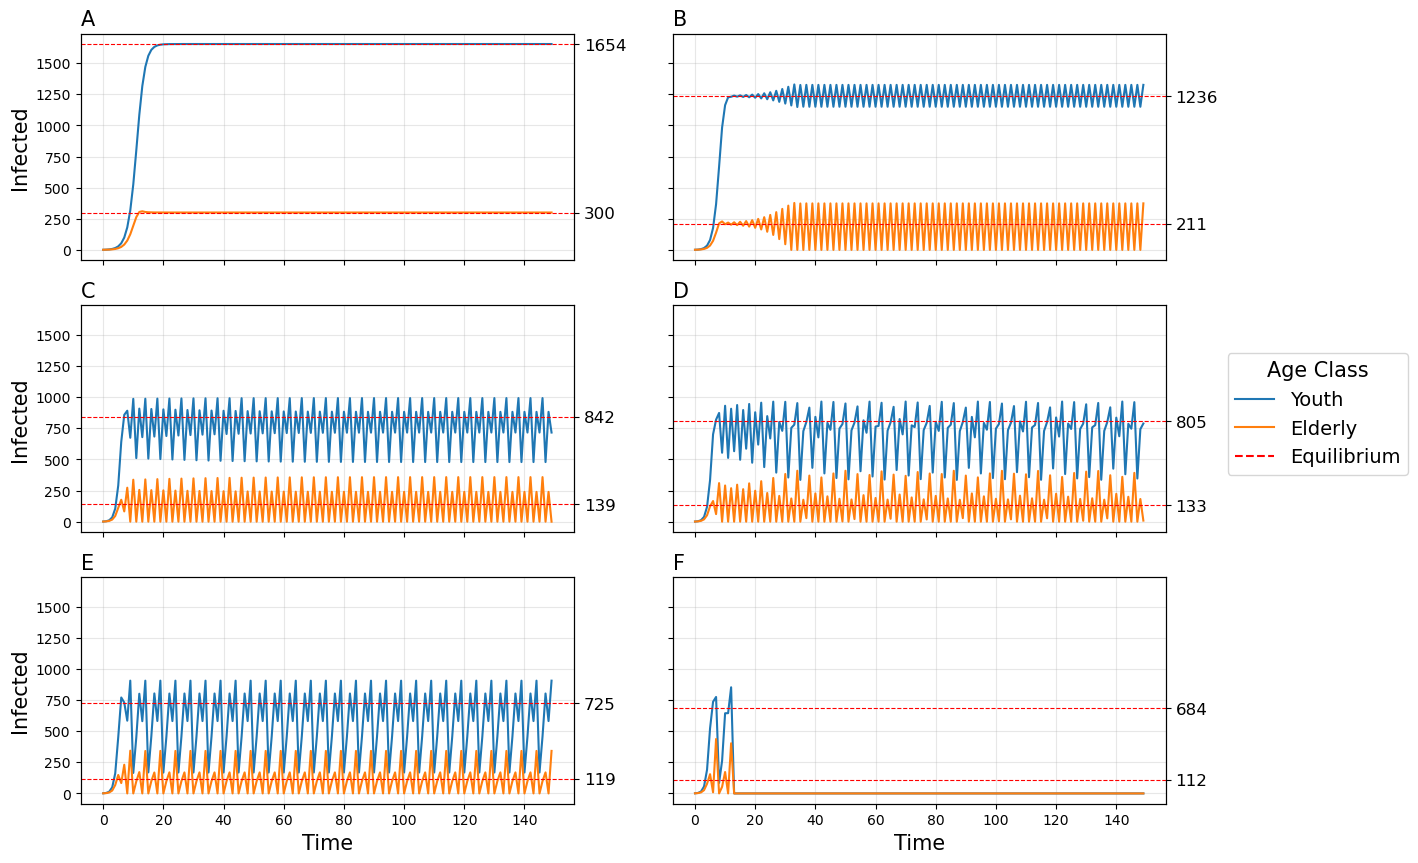

In [44]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
ijArray = [ij_a,ij_b,ij_c,ij_d,ij_e,ij_f]
b0Array = [.009,.013,.02,.021,.0235,.025]
titleArray = ["A","B","C","D","E","F"]

count = 0
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        
        
        changeVar(b0Array[count])
    
        ij = ijArray[count]
        i = 1
        j = 1

        y = [i]
        y2 = [j]
        x = range(0,150)
        for time in x[1:]:
            i_temp = equation1(i,j)
            j_temp = equation2(i,j)

            if i_temp < 0: i_temp = 0
            if i_temp > N1: i_temp = N1
            if j_temp < 0: j_temp = 0
            if j_temp > N2: j_temp = N2


            i = i_temp
            j = j_temp
            y.append(i)
            y2.append(j)

        #fig, ax = plt.subplots(figsize=(10,5))

        axs[row, col].plot(x, y, label = "Youth")
        axs[row, col].plot(x, y2, label = "Elderly")

        ax2 = axs[row, col].twinx()

        for line in ij:
            axs[row, col].axhline(y= line,linestyle='--', color='red',linewidth = .8)

        formatter = FormatStrFormatter('%.f')
        ax2.yaxis.set_major_formatter(formatter)

        ax2.set_ylim(axs[row, col].get_ylim())
        ax2.set_yticks(ij)
        
        ax2.tick_params(axis='y', labelsize=12)
        
        #set title
        axs[row,col].set_title(titleArray[count], loc= "left",size = 15)
        
        axs[row, col].grid(True, alpha= .3)
        
        # set the y-label 
        if col == 0:
            axs[row, col].set_ylabel('Infected', size = 15)

        # set the x-label 
        if row == axs.shape[0] - 1:
            axs[row, col].set_xlabel('Time', size = 15)
            
        count += 1
        
        
    
handles, labels = axs[0, 0].get_legend_handles_labels()
labels.append("Equilibrium")
handles.append(plt.Line2D([], [], linestyle='--', color='red'))

legend = fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5), fontsize=14)
legend.set_title('Age Class', prop={'size': 15})

# create a new legend 
legend_row = plt.Line2D([], [], color='red', marker='s', markersize=12, label='New Legend Row')


plt.savefig("6plots_b0", dpi = 200, bbox_inches='tight')
plt.show()

## Changing c12

### Math equations, These were derived from a wolfram alpha solver, see other script to attain these

In [45]:
#A

string = "{{i->-4254.26,j->5610.42},{i->-164.141,j->489.733},{i->0.,j->0.},{i->726.914,j->5117.59},{i->1653.86,j->300.279},{i->4175.45,j->-3980.05},{i->5165.4,j->5065.72},{i->5363.44,j->285.192}}"
ij_a, all_a = runSolve(string, b0,  0.005 )

#B

string = string = "{{i->-6788.22,j->6319.67},{i->0.,j->0.},{i->2121.22,j->1059.19},{i->2441.59,j->5097.69},{i->5229.23,j->5074.22},{i->5334.57,j->1205.32}}"
ij_b, all_b = runSolve(string, b0,0.025)

#C
string = "{{i->-19505.1,j->17654.2},{i->-7230.17,j->5791.41},{i->0.,j->0.},{i->2693.55,j->1548.53},{i->3289.6,j->5096.51},{i->5314.58,j->5082.12},{i->5359.12,j->1762.55},{i->5633.94,j->-6935.33}}"
ij_c, all_c = runSolve(string, b0, 0.04)

#D
string = "{{i->-18851.7,j->16237.1},{i->-7461.51,j->5494.03},{i->0.,j->0.},{i->3079.34,j->1865.22},{i->3734.11,j->5098.87},{i->5364.03,j->-6991.21},{i->5396.63,j->2096.53},{i->5405.77,j->5088.34}}"
ij_d, all_d = runSolve(string,b0, 0.05)

#E
string = "{{i->-24958.4,j->20012.2},{i->-8480.08,j->5180.49},{i->0.,j->0.},{i->4095.13,j->2765.49},{i->4529.06,j->5119.6},{i->5145.63,j->-7634.49},{i->5691.41,j->2996.78},{i->5977.29,j->5115.51}}"
ij_e, all_e =runSolve(string, b0, 0.08)

#F
string = "{{i->-42961.7,j->32536.1},{i->-10747.3,j->5053.81},{i->0.,j->0.},{i->4842.39,j->4280.95},{i->4878.7,j->5311.65},{i->5051.76,j->-9143.82},{i->7880.03,j->4689.59},{i->8278.35,j->5605.1}}"
ij_f, all_f = runSolve(string,b0,0.15 )





In [46]:
b0 = .009
c12Array = [ 0.005,0.025,0.04, 0.05,0.08,0.15]

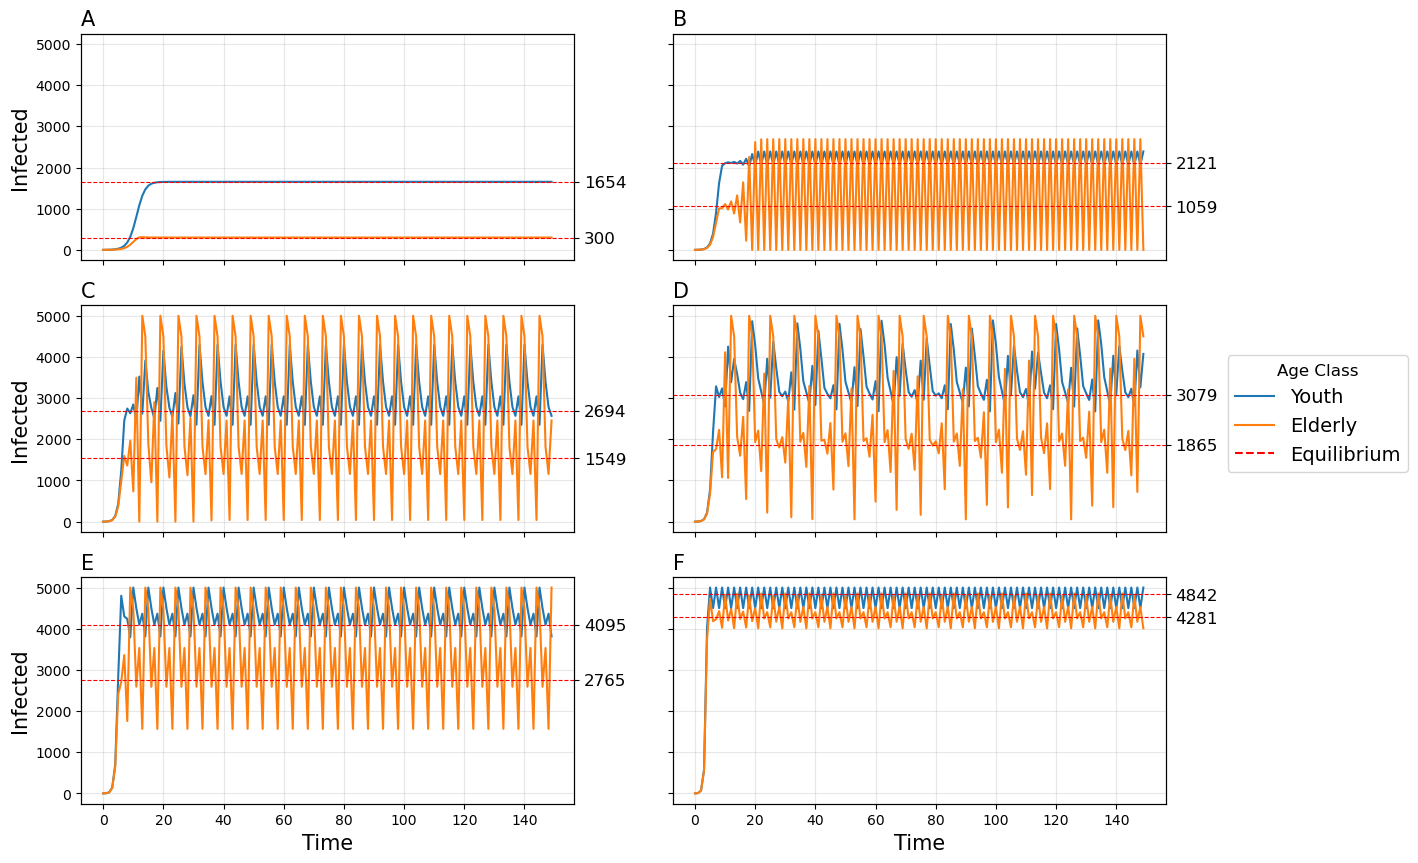

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
ijArray = [ij_a,ij_b,ij_c,ij_d,ij_e,ij_f]

titleArray = ["A","B","C","D","E","F"]

count = 0
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        
        
        changeVar(b0,c12Array[count])
    
        ij = ijArray[count]
        i = 1
        j = 1

        y = [i]
        y2 = [j]
        x = range(0,150)
        for time in x[1:]:
            i_temp = equation1(i,j)
            j_temp = equation2(i,j)

            if i_temp < 0: i_temp = 0
            if i_temp > N1: i_temp = N1
            if j_temp < 0: j_temp = 0
            if j_temp > N2: j_temp = N2


            i = i_temp
            j = j_temp
            y.append(i)
            y2.append(j)

        #fig, ax = plt.subplots(figsize=(10,5))

        axs[row, col].plot(x, y, label = "Youth")
        axs[row, col].plot(x, y2, label = "Elderly")

        ax2 = axs[row, col].twinx()

        for line in ij:
            axs[row, col].axhline(y= line,linestyle='--', color='red',linewidth = .8)

        formatter = FormatStrFormatter('%.f')
        ax2.yaxis.set_major_formatter(formatter)

        ax2.set_ylim((-250.0, 5250.0))
        ax2.set_yticks(ij)
        ax2.tick_params(axis='y', labelsize=12)
        
        #set title
        axs[row,col].set_title(titleArray[count], loc= "left",size = 15)
        
        axs[row, col].grid(True, alpha= .3)
        
        # set the y-label
        if col == 0:
            axs[row, col].set_ylabel('Infected', size = 15)

        # set the x-label 
        if row == axs.shape[0] - 1:
            axs[row, col].set_xlabel('Time', size = 15)
            
        count += 1
        
        
    
handles, labels = axs[0, 0].get_legend_handles_labels()
labels.append("Equilibrium")
handles.append(plt.Line2D([], [], linestyle='--', color='red'))

legend = fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5),fontsize=14)
legend.set_title('Age Class',prop={'size': 12})

# create a new legend
legend_row = plt.Line2D([], [], color='red', marker='s', markersize=15, label='New Legend Row')


plt.savefig("6plots_c12", dpi = 200, bbox_inches='tight')
plt.show()